In [1]:
import numpy as np
import math
# import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# STOCK DATA

In [2]:
# data = yf.download("MSFT", start="2000-01-01", end="2021-07-01")
# data.rename(lambda x: x.strip('*').replace(' ', '_').lower(), axis='columns', inplace=True)
# data.to_csv('DATA_MSFT.csv')
data = pd.read_csv("DATA_MSFT.csv")
data

,Date,open,high,low,close,adj_close,volume
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600
...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5409 non-null   object 
 1   open       5409 non-null   float64
 2   high       5409 non-null   float64
 3   low        5409 non-null   float64
 4   close      5409 non-null   float64
 5   adj_close  5409 non-null   float64
 6   volume     5409 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 295.9+ KB


# INDICATORS




1.   **Close Price**


2.   **Price Rate of Change (ROC)**

In [4]:
def ROC(df, n=12):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC

In [5]:
data['ROC'] = ROC(data['close'], 12)
data

,Date,open,high,low,close,adj_close,volume,ROC
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600,NaN
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400,NaN
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000,NaN
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600,NaN
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600,NaN
...,...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900,5.165821
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100,3.024413
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000,4.199459
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800,4.428789



3.   **Relative Strength Index (RSI)**


In [6]:
def RSI(df, n=14):
    close = df['close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

In [7]:
data['RSI'] = RSI(data)
data

,Date,open,high,low,close,adj_close,volume,ROC,RSI
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600,NaN,NaN
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400,NaN,NaN
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000,NaN,NaN
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600,NaN,NaN
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900,5.165821,79.642017
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100,3.024413,72.006211
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000,4.199459,78.911467
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800,4.428789,80.094533



4.   **Moving Averages**

In [8]:
data['SMA_30'] = data['close'].rolling(30).mean().shift()
data

,Date,open,high,low,close,adj_close,volume,ROC,RSI,SMA_30
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600,NaN,NaN,NaN
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400,NaN,NaN,NaN
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000,NaN,NaN,NaN
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600,NaN,NaN,NaN
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900,5.165821,79.642017,252.061999
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100,3.024413,72.006211,252.984999
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000,4.199459,78.911467,253.717999
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800,4.428789,80.094533,254.403666



5.   **Bolling Bands**

# XGBOOST 


1.   **Prepare Input**

In [9]:
df = data[["close"]].copy()
df["target"] = df.close.shift(-1)
df.dropna(inplace=True)
df = df.head(500)
df

,close,target
0,58.375000,58.281250
1,58.281250,56.312500
2,56.312500,56.906250
3,56.906250,55.000000
4,55.000000,55.718750
...,...,...
495,33.770000,33.634998
496,33.634998,33.840000
497,33.840000,33.924999
498,33.924999,33.935001


In [10]:
def train_test_split(dataXg, perc):
    dataXg = dataXg.values
    n = int(len(dataXg) * (1 - perc))
    return dataXg[:n], dataXg[n:]

train, test = train_test_split(df, 0.2)
X = train[:, :-1]
y = train[:, -1]


2.   **Train Model**

In [11]:
from xgboost import XGBRegressor

model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
model.fit(X, y)
model.save_model('MODEL_XGBOOST.h5')


3.   **Test Model**

In [12]:
def xgb_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
    model.fit(X, y)

    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

In [13]:
xgb_predict(train, test[0, 0])

33.29593

In [14]:
from sklearn.metrics import mean_squared_error

def validate(data, perc):
    predictions = []

    train, test = train_test_split(data, perc)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]

        pred = xgb_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions

In [15]:
rmse, y, pred = validate(df, 0.2)

C:\Users\phuc\anaconda3\lib\site-packages\xgboost\data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


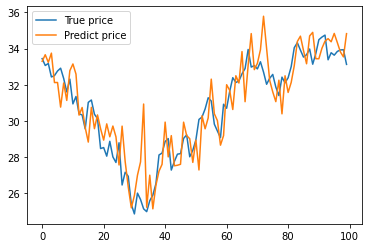

In [16]:
from matplotlib import pyplot
pyplot.plot(y, label='True price')
pyplot.plot(pred, label='Predict price')
pyplot.legend()
pyplot.show()

# RNN

1. Prepare inputs

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))

# Input 1
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []
for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i - prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Input 2 (close and ROC)
scaled_data_2 = scaler.fit_transform(data[['close', 'ROC']].values) # lấy 2 cột, khi lấy nhiều cột thì đặt toàn bộ tên các cột vào 1 list và cũng không cần reshape

x_train_2 = []
y_train_2 = []
for i in range(prediction_days, len(scaled_data_2)):
    x_train_2.append(scaled_data_2[i - prediction_days:i, :]) # dấu : thứ 2 nghĩa là lấy hết các cột
    y_train_2.append(scaled_data_2[i, 0]) # số 0 nghĩa là chỉ xài cột đầu (cái 'Close') để làm y

x_train_2, y_train_2 = np.array(x_train_2), np.array(y_train_2)

1. Build the model

In [18]:
from tensorflow.keras.layers import Dropout

In [ ]:
# Build model
RNN_model = Sequential()

RNN_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
RNN_model.add(Dropout(0.2))
RNN_model.add(LSTM(units=50, return_sequences=True))
RNN_model.add(Dropout(0.2))
RNN_model.add(LSTM(units=50, return_sequences=True))
RNN_model.add(Dropout(0.2))
RNN_model.add(LSTM(units=50))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(units=1))

RNN_model.compile(optimizer='adam', loss='mean_squared_error')
RNN_model.fit(x_train, y_train, epochs=25, batch_size=32)

RNN_model.save('RNN_Model.h5')

Epoch 1/25
168/168 [==============================] - 21s 93ms/step - loss: 0.0023
Epoch 2/25
168/168 [==============================] - 16s 95ms/step - loss: 0.0011
Epoch 3/25
168/168 [==============================] - 16s 94ms/step - loss: 9.3437e-04
Epoch 4/25
168/168 [==============================] - 16s 95ms/step - loss: 8.2102e-04
Epoch 5/25
168/168 [==============================] - 16s 95ms/step - loss: 6.1837e-04
Epoch 6/25
168/168 [==============================] - 16s 96ms/step - loss: 7.5812e-04
Epoch 7/25
168/168 [==============================] - 16s 95ms/step - loss: 7.6382e-04
Epoch 8/25
 23/168 [===>..........................] - ETA: 13s - loss: 9.1348e-04

In [ ]:
# Build model 2 (close and ROC)
RNN_model_2 = Sequential()

RNN_model_2.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_2.shape[1],2))) # Lấy 2 columns
RNN_model_2.add(Dropout(0.2))
RNN_model_2.add(LSTM(units=50, return_sequences=True))
RNN_model_2.add(Dropout(0.2))
RNN_model_2.add(LSTM(units=50, return_sequences=True))
RNN_model_2.add(Dropout(0.2))
RNN_model_2.add(LSTM(units=50))
RNN_model_2.add(Dropout(0.2))
RNN_model_2.add(Dense(units=1))

RNN_model_2.compile(optimizer='adam', loss='mean_squared_error')
RNN_model_2.fit(x_train_2, y_train_2, epochs=25, batch_size=32)

RNN_model_2.save('RNN_Model_2.h5')

3. Load test data

In [ ]:
import yfinance as yf

In [ ]:
test_start = "2021-07-02"
test_end = "2021-07-10" # now
test_data = yf.download("MSFT", start=test_start, end=test_end)
test_data.reset_index(inplace=True)
test_data.rename(lambda x: x.strip('*').replace(' ', '_').lower(), axis='columns', inplace=True)
test_data['ROC'] = ROC(test_data['close'], 12)
test_data['RSI'] = RSI(test_data)
test_data['SMA_30'] = test_data['close'].rolling(30).mean().shift()
test_data

In [ ]:
# Close
#actual_prices = test_data['close'].values
#total_dataset = pd.concat((data['close'], test_data['close']), axis=0)
#model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
#model_inputs = model_inputs.reshape(-1,1)
#model_inputs = scaler.transform(model_inputs)

# Close & ROC
actual_prices_2 = test_data['close'].values
total_dataset_2 = pd.concat((data[['close', 'ROC']], test_data[['close', 'ROC']]), axis=0)

model_inputs_2 = total_dataset_2[len(total_dataset_2) - len(test_data) - prediction_days:].values
model_inputs_2 = scaler.transform(model_inputs_2)

4. Make predictions on test data

In [ ]:
# Close
#x_test = []

#for i in range(prediction_days, len(model_inputs)):
#    x_test.append(model_inputs[i - prediction_days:i, 0])
    
#x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#predicted_prices = RNN_model.predict(x_test)
#predicted_prices = scaler.inverse_transform(predicted_prices)

# Close & ROC
x_test_2 = []

for i in range(prediction_days, len(model_inputs_2)):
    x_test_2.append(model_inputs_2[i - prediction_days:i, :])
    
x_test_2 = np.array(x_test_2)

predicted_prices_2 = RNN_model_2.predict(x_test_2)

# chỗ này tại vì cái scaler được fit cho 2 cột, mà prediction chỉ có 1 cột nên tile nó để inverse_transform
# sau đó bỏ bớt 1 cái đi
predicted_prices_2 = scaler.inverse_transform(np.tile(predicted_prices_2, (1, 2)))[:, 0]

5. Plot the test predictions

In [ ]:
#plt.plot(actual_prices, color='black',label='Actual prices')
#plt.plot(predicted_prices, color='green', label='Predicted prices')
#plt.title('Title')
#plt.xlabel('Time')
#plt.ylabel('MSFT Share Price')
#plt.legend()
#plt.show()

# close & ROC
plt.plot(actual_prices_2, color='black',label='Actual prices')
plt.plot(predicted_prices_2, color='green', label='Predicted prices')
plt.title('Title')
plt.xlabel('Time')
plt.ylabel('MSFT Share Price')
plt.legend()
plt.show()

6. Predict next day

In [ ]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Prediction: ")
print(prediction)

# LSTM


1.   **Prepare Input**

In [ ]:
dataset = data[['close']].values
dataset

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)
dataset

In [ ]:
X, y = [], []
for i in range(60, len(dataset)):
    X.append(dataset[i-60:i][:])
    y.append(dataset[i][0])
print(len(X))
print(len(y))

In [ ]:
X_train, y_train = np.array(X[:math.ceil(len(X)*0.8)]), np.array(y[:math.ceil(len(X)*0.8)])
X_val, y_val = np.array(X[math.ceil(len(X)*0.8):math.ceil(len(X)*0.9)]), np.array(y[math.ceil(len(X)*0.8):math.ceil(len(X)*0.9)])
X_test, y_test = np.array(X[math.ceil(len(X)*0.9):]), np.array(y[math.ceil(len(X)*0.9):])
print("Size train: ", X_train.shape)
print("Size validate: ", X_val.shape)
print("Size test: ", X_test.shape)


2.   **Train Model**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(20, activation=None))
model.add(Dense(1, activation=None))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True, validation_data=(X_val, y_val))
model.save("MODEL_LSTM.h5")


3.   **Test Model**

In [ ]:
model_lstm=load_model("MODEL_LSTM.h5")

In [ ]:
predictions = model_lstm.predict(X_test)
predictions=scaler.inverse_transform(predictions)
predictions

In [ ]:
valid_df = data.iloc[-len(predictions):]
valid_df['predictions'] = predictions

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(data['close'])
plt.plot(valid_df['predictions'])
plt.legend(['True price', 'Predict price'], loc = 'lower right')
plt.show()

In [ ]:
X_future = []
X_future.append(dataset[-60:])
X_future = np.array(X_future)
X_future.shape

In [ ]:
y_future = yf.download("MSFT", start="2021-07-01", end="2021-07-02")
y_future

In [ ]:
y_pred = model_lstm.predict(X_future)
y_pred = scaler.inverse_transform(y_pred)
y_pred

In [ ]:
!python3 1_StockApp.py